In [2]:
import pandas as pd
import numpy as np
#sklearn.preprocessing의 scale: 스케일 조정 패키지
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [3]:
#sklearn.svm의 SVC: & from sklearn.preprocessing의 scale
from sklearn.svm import SVC

In [4]:
ds_hmeq = pd.read_csv('./Downloads/week4day1/HMEQ.csv',encoding='CP949',engine='python')
ds_hmeq.head()
#타겟이 이산형

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
#결측치 확인
ds_hmeq.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
#fillna : 결측치 채우는 함수
ds_hmeq["JOB"].fillna("Other", inplace=True)
#아예 비면 빠지므로 아더 입력
ds_hmeq.fillna(ds_hmeq.mean(), inplace=True)
#연속형 데이터에 평균값 입력

In [7]:
ds_hmeq_dummy=pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [8]:
np.random.seed(seed=1234)
msk=np.random.rand(ds_hmeq_dummy.shape[0]) <0.7
ds_hmeq_train=ds_hmeq_dummy[msk]
ds_hmeq_test=ds_hmeq_dummy[~msk]

ds_hmeq_train_y=ds_hmeq_train["BAD"]
ds_hmeq_train_x=ds_hmeq_train.drop("BAD", axis=1, inplace=False)
ds_hmeq_test_y=ds_hmeq_test["BAD"]
ds_hmeq_test_x=ds_hmeq_test.drop("BAD", axis=1, inplace=False)

print("train data X size : {}".format(ds_hmeq_train_x.shape))
print("train data Y size : {}".format(ds_hmeq_train_y.shape))
print("test data X size : {}".format(ds_hmeq_test_x.shape))
print("test data Y size : {}".format(ds_hmeq_test_y.shape))

train data X size : (2604, 18)
train data Y size : (2604,)
test data X size : (1144, 18)
test data Y size : (1144,)


In [9]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))



Accuracy on training set: 1.000
Accuracy on test set: 0.910


In [10]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
train_accuracy=[]
test_accuracy=[]
para_C=[]

for C in range(10):
    svm1=SVC(C=(C+1)/10, random_state=1234)
    svm1.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    para_C.append((C+1)/10)
    train_accuracy.append(svm1.score(ds_hmeq_train_x,ds_hmeq_train_y))
    test_accuracy.append(svm1.score(ds_hmeq_test_x,ds_hmeq_test_y))
    
ds_accuracy1=pd.DataFrame()
ds_accuracy1["C"]=para_C
ds_accuracy1["TrainAccuracy"]=train_accuracy
ds_accuracy1["TestAccuracy"]=test_accuracy

In [12]:
ds_accuracy1.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.907,0.91
1,0.2,0.907,0.91
2,0.3,0.907,0.91
3,0.4,0.907,0.91
4,0.5,0.907,0.91
5,0.6,0.907,0.91
6,0.7,0.907,0.91
7,0.8,0.907,0.91
8,0.9,0.907,0.91
9,1.0,1.000,0.91


In [13]:
ds_accuracy1.set_index("C", inplace=False).plot.line()

In [14]:
train_accuracy=[]
test_accuracy=[]
para_gamma=[]

for gamma in range(1,10):
    svm2=SVC(gamma=gamma/10, random_state=1234)
    svm2.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2.score(ds_hmeq_train_x,ds_hmeq_train_y))
    test_accuracy.append(svm2.score(ds_hmeq_test_x,ds_hmeq_test_y))
    
ds_accuracy2=pd.DataFrame()
ds_accuracy2["Gamma"]=para_gamma
ds_accuracy2["TrainAccuracy"]=train_accuracy
ds_accuracy2["TestAccuracy"]=test_accuracy

In [15]:
ds_accuracy2.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.91
1,0.2,1.0,0.91
2,0.3,1.0,0.91
3,0.4,1.0,0.91
4,0.5,1.0,0.91
5,0.6,1.0,0.91
6,0.7,1.0,0.91
7,0.8,1.0,0.91
8,0.9,1.0,0.91


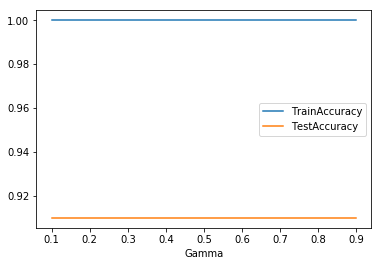

In [16]:
ds_accuracy2.set_index("Gamma", inplace=False).plot.line()

In [17]:
ds_hmeq_train_x_scaled=scale(ds_hmeq_train_x,axis=0)
ds_hmeq_test_x_scaled=scale(ds_hmeq_test_x,axis=0)
pd.DataFrame(ds_hmeq_train_x_scaled,columns=ds_hmeq_train_x.columns).head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
2,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
3,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
4,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808


In [21]:
svm_uncustomized_scaled=SVC(random_state=1234)
svm_uncustomized_scaled.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)
print("Accuracy on training set:\
 {:.3f}".format(svm_uncustomized_scaled.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized_scaled.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y)))

Accuracy on training set: 0.941
Accuracy on test set: 0.934


In [30]:
train_accuracy=[]
test_accuracy=[]
para_C=[]

for C in range(15):
    svm1_scaled=SVC(C=C+1, random_state=1234)
    svm1_scaled.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    para_C.append(C+1)
    train_accuracy.append(svm1_scaled.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
    test_accuracy.append(svm1_scaled.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
    
ds_accuracy1_scaled=pd.DataFrame()
ds_accuracy1_scaled["C"]=para_C
ds_accuracy1_scaled["TrainAccuracy"]=train_accuracy
ds_accuracy1_scaled["TestAccuracy"]=test_accuracy

In [31]:
ds_accuracy1_scaled.round(3)

,C,TrainAccuracy,TestAccuracy
0,1,0.941,0.934
1,2,0.954,0.942
2,3,0.963,0.945
3,4,0.965,0.951
4,5,0.968,0.950
5,6,0.969,0.952
6,7,0.970,0.953
7,8,0.971,0.955
8,9,0.971,0.955
9,10,0.974,0.955


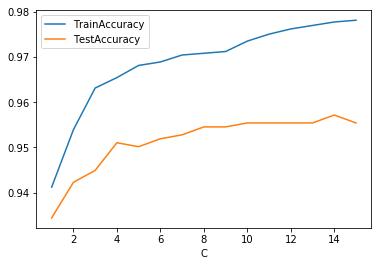

In [32]:
ds_accuracy1_scaled.set_index("C",inplace=False).plot.line()

In [33]:
train_accuracy=[]
test_accuracy=[]
para_gamma=[]

for gamma in range(1,10):
    svm2_scaled=SVC(gamma=gamma/10, random_state=1234)
    svm2_scaled.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2_scaled.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
    test_accuracy.append(svm2_scaled.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
    
ds_accuracy2_scaled=pd.DataFrame()
ds_accuracy2_scaled["Gamma"]=para_gamma
ds_accuracy2_scaled["TrainAccuracy"]=train_accuracy
ds_accuracy2_scaled["TestAccuracy"]=test_accuracy

In [34]:
ds_accuracy2_scaled.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,0.957,0.941
1,0.2,0.970,0.931
2,0.3,0.978,0.922
3,0.4,0.981,0.920
4,0.5,0.985,0.920
5,0.6,0.987,0.920
6,0.7,0.989,0.920
7,0.8,0.991,0.919
8,0.9,0.992,0.919


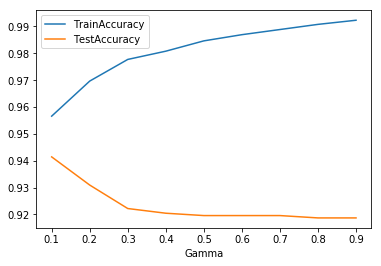

In [35]:
ds_accuracy2_scaled.set_index("Gamma",inplace=False).plot.line()